In [2]:
%pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx
from collections import Counter
import math

import warnings
warnings.filterwarnings("ignore")

# Analisi Statistica Globale "Flat" delle Label (Dataset fineExp)

L'analisi seguente descrive la distribuzione di frequenza delle attività (label) all'interno dei sottografi anomali estratti dal dataset relativo alla gestione delle sanzioni amministrative (multe stradali). L'approccio "flat" analizza le occorrenze totali dei nodi per identificare la rilevanza semantica di ogni fase del processo.

=== GLOBAL FLAT ANALYSIS OF LABELS ===
Total Occurrences (Total nodes): 1155
Vocabulary (Unique labels): 11

--- Top 10 Labels (Dominant) ---
             Label  Count  Relative_Freq
        CreateFine    143       0.123810
          SendFine    143       0.123810
      Notification    132       0.114286
AppealToPrefecture    130       0.112554
           Payment    125       0.108225
        AddPenalty    123       0.106494
        SendAppeal    105       0.090909
    ReceiveResults     97       0.083983
   NotifyOffenders     81       0.070130
     AppealToJudge     50       0.043290

--- Distribution Analysis ---
80% of the total volume is covered by only 7 labels out of 11.
Rare labels (single occurrence): 0


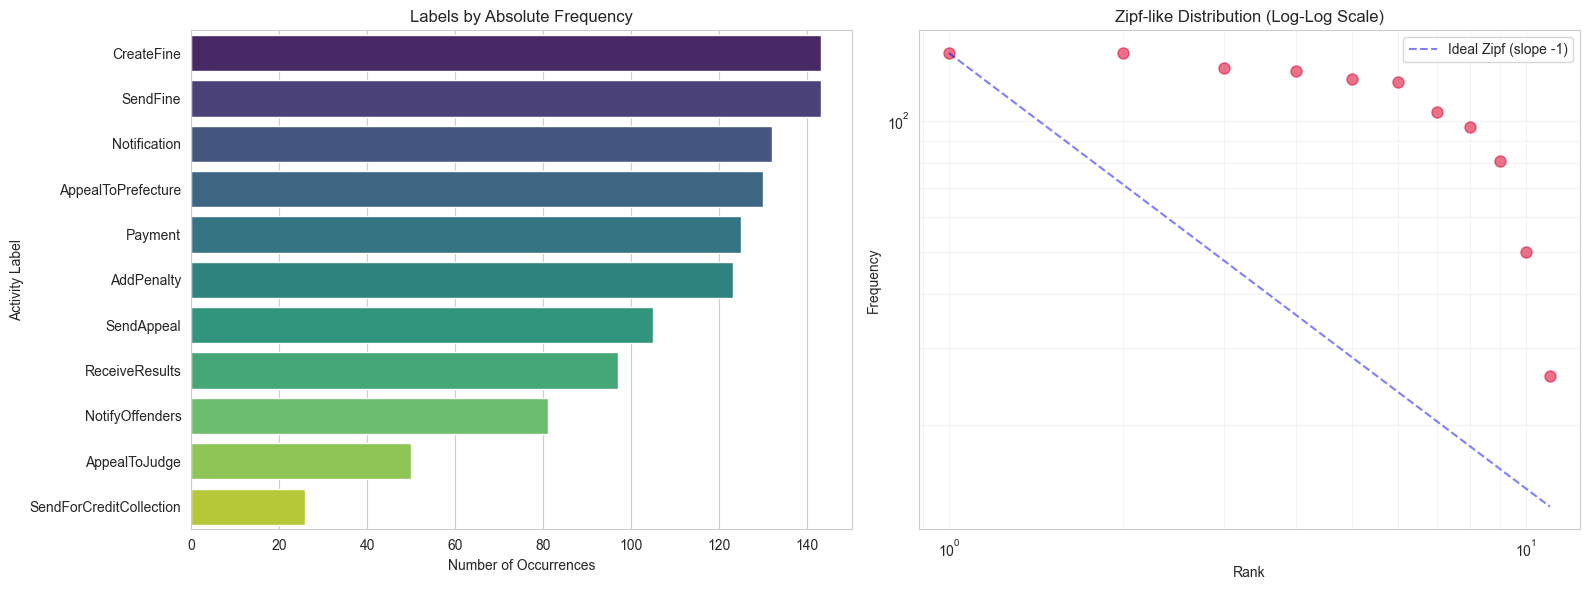

In [ ]:
def analyze_labels_flat(filepath):
    """
    Performs a 'flat' statistical analysis on node labels, 
    ignoring graph structure. Analyzes frequencies, Zipf's law, and long tail distribution.
    """
    all_labels = []
    
    # --- 1. Parsing (Label Extraction) ---
    try:
        with open(filepath, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts: continue
                
                # Looking for vertex lines: v <id> <label>
                if parts[0] == 'v':
                    # Robustness check: ensure the label exists
                    if len(parts) >= 3:
                        label = parts[2]
                        all_labels.append(label)
                        
    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
        return

    # --- 2. Statistical Calculations ---
    # Absolute frequencies
    counts = Counter(all_labels)
    total_labels = sum(counts.values())
    unique_labels = len(counts)
    
    # Create DataFrame for structured analysis
    df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])
    df.index.name = 'Label'
    df.reset_index(inplace=True)
    
    # Sort by Rank (Count descending)
    df.sort_values(by='Count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    # Additional metrics
    df['Relative_Freq'] = df['Count'] / total_labels
    df['Rank'] = df.index + 1
    df['Cumulative_Freq'] = df['Relative_Freq'].cumsum()
    
    # --- 3. Text Report ---
    print(f"=== GLOBAL FLAT ANALYSIS OF LABELS ===")
    print(f"Total Occurrences (Total nodes): {total_labels}")
    print(f"Vocabulary (Unique labels): {unique_labels}")
    
    print("\n--- Top 10 Labels (Dominant) ---")
    print(df[['Label', 'Count', 'Relative_Freq']].head(10).to_string(index=False))
    
    # Long Tail Analysis (Pareto 80/20)
    pareto_idx = df[df['Cumulative_Freq'] <= 0.80].index.max()
    if pd.isna(pareto_idx): pareto_idx = 0
    top_80_percent_count = int(pareto_idx + 1)
    
    print(f"\n--- Distribution Analysis ---")
    print(f"80% of the total volume is covered by only {top_80_percent_count} labels out of {unique_labels}.")
    print(f"Rare labels (single occurrence): {len(df[df['Count'] == 1])}")

    # --- 4. Visualization ---
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot A: Top 20 Frequencies (Bar Chart)
    # Highlights the dominance of main activities
    sns.barplot(data=df.head(20), x='Count', y='Label', ax=axes[0], palette='viridis')
    axes[0].set_title('Labels by Absolute Frequency')
    axes[0].set_xlabel('Number of Occurrences')
    axes[0].set_ylabel('Activity Label')
    
    # Plot B: Zipf's Law (Log-Log Plot)
    # If points form a descending line, it follows Zipf's law
    axes[1].loglog(df['Rank'], df['Count'], marker='o', linestyle='none', alpha=0.6, color='crimson', markersize=8)
    
    # Add an ideal reference line (y = C / x)
    # Using the first label's count as constant C
    top_freq = df['Count'].iloc[0]
    ideal_zipf = [top_freq / r for r in df['Rank']]
    axes[1].loglog(df['Rank'], ideal_zipf, 'b--', label='Ideal Zipf (slope -1)', alpha=0.5)
    
    axes[1].set_title("Zipf-like Distribution (Log-Log Scale)")
    axes[1].set_xlabel('Rank')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].grid(True, which="both", ls="-", alpha=0.2)
    
    plt.tight_layout()
    plt.show()

# Execution
analyze_labels_flat('../../datasets/subelements_fineExp.txt')

## 1. Indicatori Statistici Generali
Il dataset presenta un vocabolario estremamente compatto e specifico, indicando un dominio applicativo coerente e focalizzato su una procedura amministrativa rigida.

| Metrica | Valore |
| :--- | :--- |
| **Totale Occorrenze (Nodi)** | 1155 |
| **Vocabolario (Label uniche)** | 11 |
| **Saturazione di Pareto (80%)** | 7 label |
| **Attività Rare (occorrenza singola)** | 0 |

## 2. Distribuzione delle Frequenze Assolute e Relative
Le attività principali del processo mostrano una distribuzione molto bilanciata. La parità statistica tra le fasi di creazione e invio suggerisce un accoppiamento operazionale inscindibile.

| Label | Count | Relative_Freq |
| :--- | :--- | :--- |
| **CreateFine** | 143 | 0.123810 |
| **SendFine** | 143 | 0.123810 |
| **Notification** | 132 | 0.114286 |
| **AppealToPrefecture** | 130 | 0.112554 |
| **Payment** | 125 | 0.108225 |
| **AddPenalty** | 123 | 0.106494 |
| **SendAppeal** | 105 | 0.090909 |
| **ReceiveResults** | 97 | 0.083983 |
| **NotifyOffenders** | 81 | 0.070130 |
| **AppealToJudge** | 50 | 0.043290 |
| **SendForCreditCollection** | 26 | 0.022511 |



## 3. Analisi della Distribuzione Zipf-like
L'osservazione della distribuzione Rank-Frequency (Scala Log-Log) evidenzia una deviazione significativa dalla legge di Zipf ideale:
* **Plateau delle Top Label:** Le prime 6 attività presentano frequenze quasi paritarie, creando una curva piatta nella parte alta del rango. Questo indica l'assenza di una singola attività dominante; il processo è composto da un set di azioni "core" tutte ugualmente necessarie.
* **Assenza di Long Tail:** Il decadimento è brusco solo nelle ultime posizioni (es. SendForCreditCollection), confermando che quasi tutto il vocabolario è composto da attività fondamentali e non da eventi sporadici.

## 4. Osservazioni Semantiche e di Processo
* **Accoppiamento Deterministico:** Il conteggio identico di CreateFine e SendFine indica che, nelle anomalie estratte, ogni multa creata viene sistematicamente inviata.
* **Imbuto del Contenzioso:** Si osserva una naturale riduzione volumetrica nei percorsi di ricorso: dal livello amministrativo (AppealToPrefecture, 130) si scende sensibilmente verso quello giudiziario (AppealToJudge, 50).
* **Efficacia della Risoluzione:** L'attività di Payment (125) mantiene una frequenza elevata, posizionandosi come uno degli esiti principali nonostante la natura anomala dei sottografi analizzati.

## 5. Conclusioni
Il dataset fineExp è caratterizzato da un'alta densità informativa distribuita su un numero ristretto di label essenziali. Poiché il 100% del volume è coperto da sole 11 label e non esistono attività rare, si deduce che i sottografi estratti rappresentano varianti strutturali "corpose" e complete del processo di business, piuttosto che frammenti isolati.

---

# Analisi dei Punti di Ingresso, Uscita e Dimensionalità dei Sottografi

L'analisi dei nodi iniziali (sorgenti) e finali (pozzi) permette di identificare dove iniziano e dove terminano i pattern anomali all'interno del processo di gestione sanzioni, mentre lo studio della dimensione dei sottografi ne chiarisce l'estensione strutturale.


--- General Statistics ---
Total Subgraphs: 167
Average Nodes: 6.92

--- Top 5 Initial Nodes ---
start_node
CreateFine        107
ReceiveResults     25
SendAppeal         11
Payment            10
AddPenalty          8
Name: count, dtype: int64

--- Top 5 Final Nodes ---
Payment                    66
SendForCreditCollection    22
SendAppeal                 21
NotifyOffenders            18
AppealToJudge              17
Name: count, dtype: int64


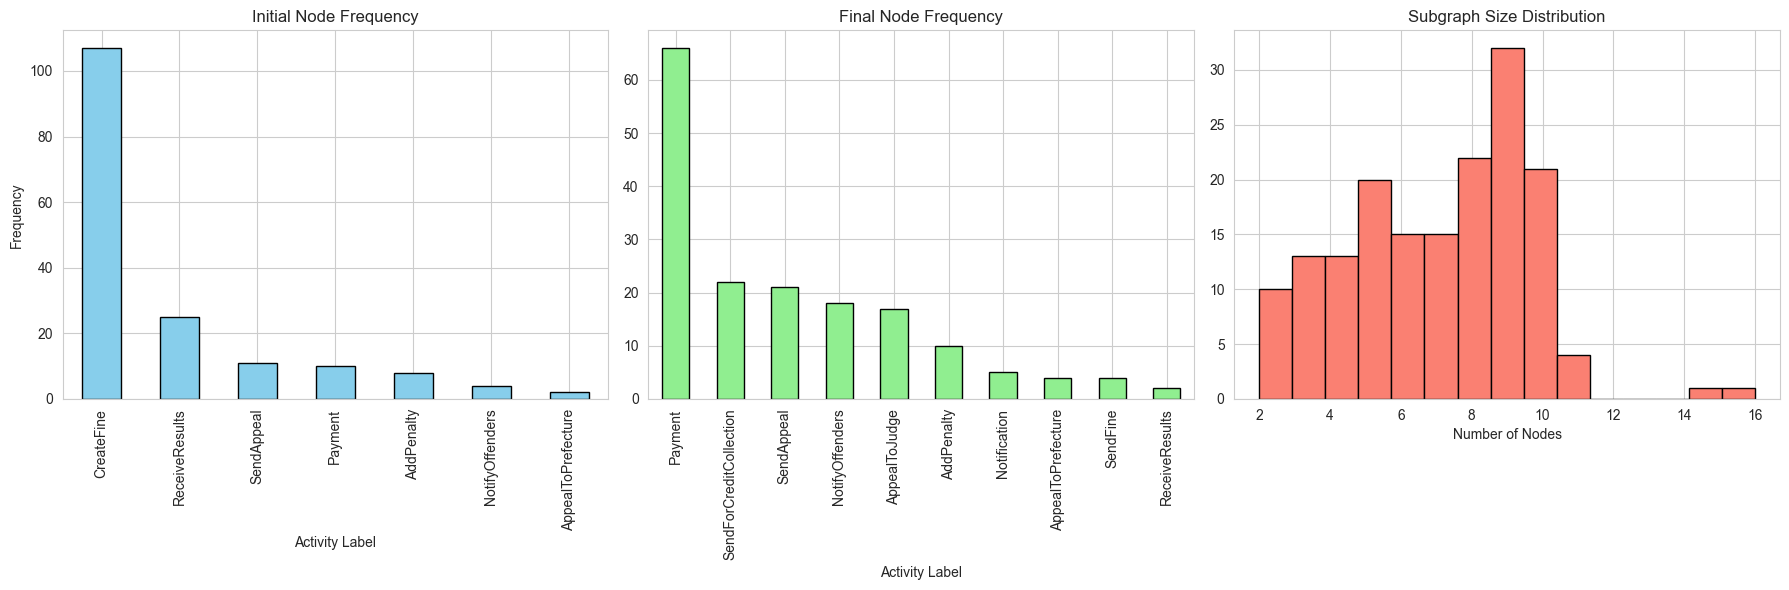

In [5]:
def analyze_subelements(filepath):
    """
    Analyzes the subelements.txt file to extract statistics on initial nodes,
    final nodes, and subgraph dimensions.
    """
    graphs_data = []
    
    # Temporary variables for parsing the current graph
    current_nodes = {}  # Map ID -> Label
    current_edges_sources = set() # Set of source IDs
    current_start_node = None
    
    try:
        with open(filepath, 'r') as f:
            lines = f.readlines()
            
        for line in lines:
            parts = line.strip().split()
            if not parts: continue
            
            # 'S' indicates the start of a new subgraph
            if parts[0] == 'S':
                # Save data from the previous graph if it exists
                if current_nodes:
                    # Final nodes are those that never appear as the source of an edge
                    end_nodes = [label for nid, label in current_nodes.items() if nid not in current_edges_sources]
                    
                    # Special case: graph with only one node or no edges
                    if not current_edges_sources and current_nodes:
                         end_nodes = list(current_nodes.values())

                    graphs_data.append({
                        'start_node': current_start_node,
                        'num_nodes': len(current_nodes),
                        'end_nodes': end_nodes
                    })
                
                # Reset for the new graph
                current_nodes = {}
                current_edges_sources = set()
                current_start_node = None
                
            elif parts[0] == 'v':
                # v <id> <label>
                nid, label = parts[1], parts[2]
                current_nodes[nid] = label
                
                # Assume v 1 is the start node
                if nid == '1':
                    current_start_node = label
                    
            elif parts[0] in ['d', 'e']:
                # d <src> <tgt> <label>
                src = parts[1]
                current_edges_sources.add(src)
        
        # Add the last graph in the file
        if current_nodes:
            end_nodes = [label for nid, label in current_nodes.items() if nid not in current_edges_sources]
            if not current_edges_sources: end_nodes = list(current_nodes.values())
            graphs_data.append({
                'start_node': current_start_node,
                'num_nodes': len(current_nodes),
                'end_nodes': end_nodes
            })
            
        # --- DataFrame Creation and Statistics ---
        df_graphs = pd.DataFrame(graphs_data)
        
        # List of final nodes (a graph can have more than one)
        all_end_nodes = [node for sublist in df_graphs['end_nodes'] for node in sublist]
        end_node_counts = pd.Series(all_end_nodes).value_counts()
        
        print(f"--- General Statistics ---")
        print(f"Total Subgraphs: {len(df_graphs)}")
        print(f"Average Nodes: {df_graphs['num_nodes'].mean():.2f}")
        
        print("\n--- Top 5 Initial Nodes ---")
        print(df_graphs['start_node'].value_counts().head(5))
        
        print("\n--- Top 5 Final Nodes ---")
        print(end_node_counts.head(5))
        
        # --- Graph Generation ---
        plt.figure(figsize=(18, 6))
        
        # 1. Initial Nodes
        plt.subplot(1, 3, 1)
        df_graphs['start_node'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Initial Node Frequency')
        plt.xlabel('Activity Label')
        plt.ylabel('Frequency')
        
        # 2. Final Nodes
        plt.subplot(1, 3, 2)
        end_node_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title('Final Node Frequency')
        plt.xlabel('Activity Label')
        
        # 3. Dimension
        plt.subplot(1, 3, 3)
        plt.hist(df_graphs['num_nodes'], bins=15, color='salmon', edgecolor='black')
        plt.title('Subgraph Size Distribution')
        plt.xlabel('Number of Nodes')
        
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")

# Execution
analyze_subelements('../../datasets/subelements_fineExp.txt')

## 1. Indicatori Statistici Generali
Il dataset è composto da un numero significativo di istanze, con una complessità strutturale media contenuta.

| Metrica | Valore |
| :--- | :--- |
| **Totale Sottografi** | 167 |
| **Media Nodi per Sottografo** | 6.92 |

## 2. Analisi dei Nodi Iniziali (Punti di Ingresso)
La distribuzione dei nodi iniziali rivela la natura dei sottografi estratti.

* **Dominanza di "CreateFine" (107 occorrenze):** La stragrande maggioranza delle anomalie riguarda l'intero ciclo di vita della sanzione, partendo dalla sua creazione. Ciò indica che l'algoritmo BIG cattura varianti complete del processo primario.
* **Punti di Ingresso Secondari:** Label come `ReceiveResults` (25) e `SendAppeal` (11) segnano l'inizio di pattern anomali focalizzati esclusivamente sulla fase di contenzioso o sulla ricezione di esiti amministrativi.

## 3. Analisi dei Nodi Finali (Punti di Uscita)
La convergenza verso stati finali specifici permette di mappare gli esiti delle anomalie.

* **Terminazione Standard (Payment - 66):** Nonostante la natura anomala dei sottografi, il pagamento rimane l'esito finale più frequente. Questo suggerisce che le anomalie risiedono nel percorso intrapreso (percorso deviante) piuttosto che nel risultato finale.
* **Esiti Critici:** La presenza di `SendForCreditCollection` (22) e `AppealToJudge` (17) come nodi finali evidenzia pattern che terminano in fasi di recupero forzoso o in procedimenti giudiziari complessi.
* **Sincronia di Contenzioso:** `SendAppeal` (21) compare spesso come nodo finale, indicando sottografi che si interrompono dopo l'invio del ricorso, senza tracciare l'esito finale.

## 4. Distribuzione delle Dimensioni
L'istogramma delle dimensioni fornisce informazioni sulla "corposità" delle anomalie rilevate.

* **Scala delle Anomalie:** Con una media di 6.92 nodi, i sottografi non sono semplici errori locali (2-3 nodi), ma rappresentano deviazioni che coinvolgono diversi passaggi sequenziali.
* **Picchi di Distribuzione:** Si osserva un picco significativo intorno agli 8-10 nodi, corrispondente a varianti di processo quasi integrali (dalla creazione alla notifica/ricorso).
* **Anomalie Estese:** La presenza di sottografi fino a 16 nodi indica la rilevazione di cicli di contenzioso molto lunghi e articolati.

## 5. Conclusioni Topologiche
Il dataset fineExp mostra un effetto di **convergenza verso l'uscita**: a fronte di una varietà di punti di ingresso e di percorsi intermedi, il processo tende a chiudersi prevalentemente su `Payment`. La dimensione media contenuta (~7 nodi) suggerisce che le anomalie estratte siano varianti "compatte" ma strutturalmente complete di specifici rami del workflow amministrativo.

---

# Caratterizzazione Dimensionale e Topologica dei Sottografi (fineExp)

L'analisi integrata delle metriche di scala e di connettività permette di definire il profilo strutturale delle anomalie estratte dal dataset relativo alla gestione delle sanzioni amministrative.


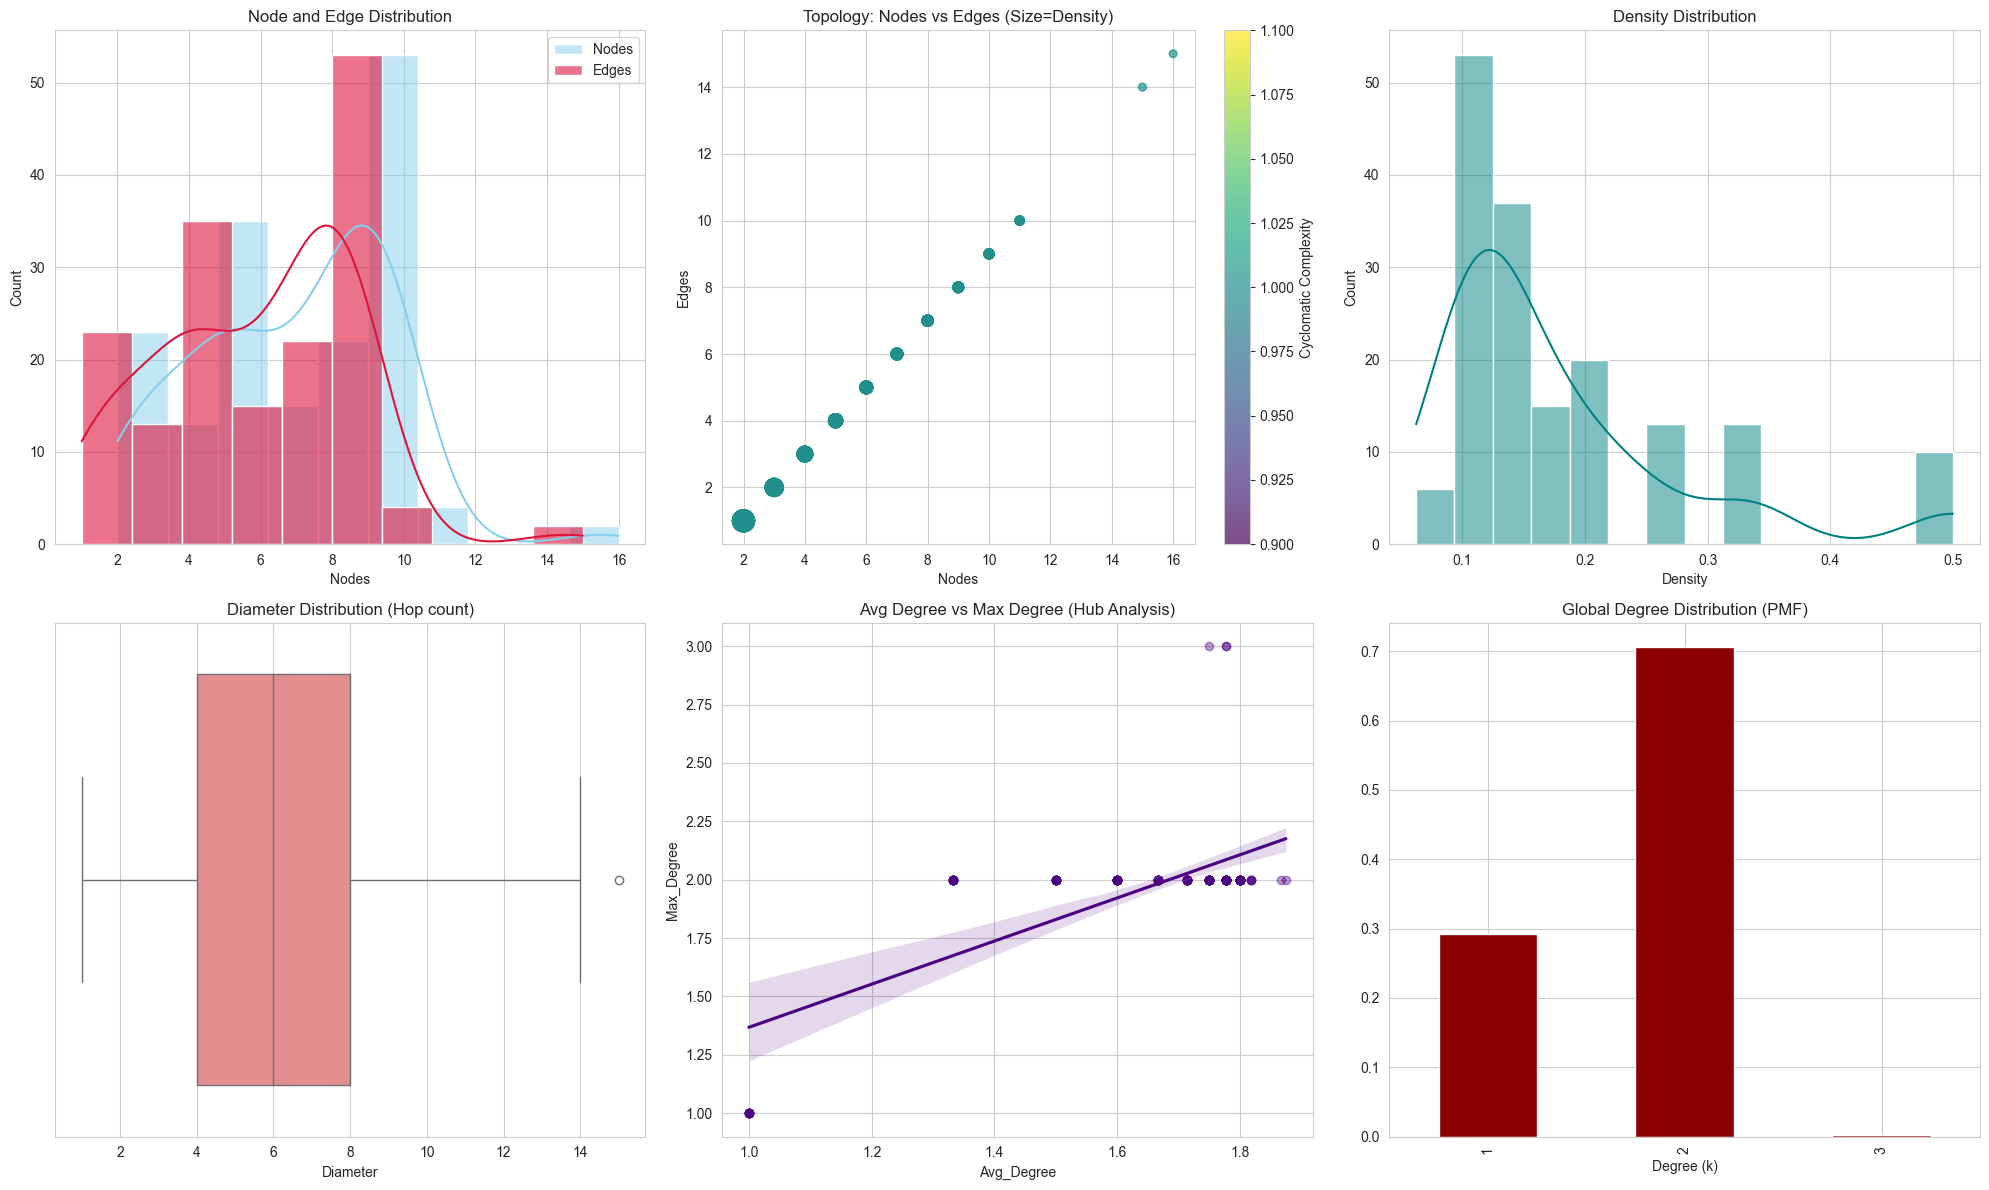

=== UNIFIED STATISTICAL REPORT ===
                       count  mean   std   min   25%   50%   75%    max
Nodes                  167.0  6.92  2.71  2.00  5.00  7.00  9.00  16.00
Edges                  167.0  5.92  2.71  1.00  4.00  6.00  8.00  15.00
Density                167.0  0.18  0.11  0.06  0.11  0.14  0.20   0.50
Cyclomatic_Complexity  167.0  1.00  0.00  1.00  1.00  1.00  1.00   1.00
Diameter               167.0  5.90  2.70  1.00  4.00  6.00  8.00  15.00
Avg_Degree             167.0  1.64  0.21  1.00  1.60  1.71  1.78   1.88


In [6]:
def unified_subgraph_analysis(filepath):
    """
    Performs a unified dimensional and topological analysis of subgraphs.
    Generates a dashboard and a statistical report.
    """
    graphs = []
    
    # --- 1. Graph Parsing ---
    try:
        with open(filepath, 'r') as f:
            current_G = None
            for line in f:
                parts = line.strip().split()
                if not parts: continue
                if parts[0] == 'S':
                    if current_G: graphs.append(current_G)
                    current_G = nx.DiGraph()
                elif parts[0] == 'v':
                    # v <id> <label>
                    current_G.add_node(parts[1], label=parts[2])
                elif parts[0] in ['d', 'e']:
                    # d <src> <tgt>
                    src, tgt = parts[1], parts[2]
                    current_G.add_edge(src, tgt)
            if current_G: graphs.append(current_G)
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return

    # --- 2. Metric Calculation ---
    stats = []
    all_degrees = []
    
    for i, G in enumerate(graphs):
        n = G.number_of_nodes()
        e = G.number_of_edges()
        if n == 0: continue
        
        density = nx.density(G)
        # Cyclomatic Complexity (McCabe): E - N + 2P (assuming P=1 connected component)
        cyclomatic = e - n + 2 
        
        degrees = [d for n, d in G.degree()]
        avg_degree = np.mean(degrees)
        max_degree = np.max(degrees)
        all_degrees.extend(degrees)
        
        # Diameter and Path Length (on undirected version)
        G_undir = G.to_undirected()
        if nx.is_connected(G_undir):
            diameter = nx.diameter(G_undir)
        else:
            # If not connected, take the diameter of the largest component
            largest_cc = max(nx.connected_components(G_undir), key=len)
            subgraph = G_undir.subgraph(largest_cc)
            diameter = nx.diameter(subgraph)

        stats.append({
            'Nodes': n,
            'Edges': e,
            'Density': density,
            'Cyclomatic_Complexity': cyclomatic,
            'Diameter': diameter,
            'Avg_Degree': avg_degree,
            'Max_Degree': max_degree
        })

    df = pd.DataFrame(stats)

    # --- 3. Visualization ---
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # A. Node and Edge Distribution
    sns.histplot(df['Nodes'], kde=True, color='skyblue', ax=axes[0,0], label='Nodes')
    sns.histplot(df['Edges'], kde=True, color='crimson', ax=axes[0,0], label='Edges', alpha=0.6)
    axes[0,0].set_title('Node and Edge Distribution')
    axes[0,0].legend()

    # B. Topology Scatter: Nodes vs Edges and Complexity
    scatter = axes[0,1].scatter(df['Nodes'], df['Edges'], c=df['Cyclomatic_Complexity'], 
                                cmap='viridis', s=df['Density']*500, alpha=0.7)
    axes[0,1].set_title('Topology: Nodes vs Edges (Size=Density)')
    axes[0,1].set_xlabel('Nodes')
    axes[0,1].set_ylabel('Edges')
    fig.colorbar(scatter, ax=axes[0,1], label='Cyclomatic Complexity')

    # C. Density Distribution
    sns.histplot(df['Density'], kde=True, color='teal', ax=axes[0,2])
    axes[0,2].set_title('Density Distribution')

    # D. Diameter Boxplot
    sns.boxplot(x=df['Diameter'], color='lightcoral', ax=axes[1,0])
    axes[1,0].set_title('Diameter Distribution (Hop count)')

    # E. Avg Degree vs Max Degree (Hub Analysis)
    sns.regplot(data=df, x='Avg_Degree', y='Max_Degree', scatter_kws={'alpha':0.4}, color='indigo', ax=axes[1,1])
    axes[1,1].set_title('Avg Degree vs Max Degree (Hub Analysis)')

    # F. Global Degree Distribution
    deg_counts = pd.Series(all_degrees).value_counts(normalize=True).sort_index()
    deg_counts.plot(kind='bar', color='darkred', ax=axes[1,2])
    axes[1,2].set_title('Global Degree Distribution (PMF)')
    axes[1,2].set_xlabel('Degree (k)')

    plt.tight_layout()
    plt.show()

    # Statistical Report
    print("=== UNIFIED STATISTICAL REPORT ===")
    print(df[['Nodes', 'Edges', 'Density', 'Cyclomatic_Complexity', 'Diameter', 'Avg_Degree']].describe().round(2).T)

# Execution
unified_subgraph_analysis('../../datasets/subelements_fineExp.txt')

## 1. Sintesi delle Metriche Topologiche
Il dataset presenta sottografi con una struttura estremamente regolare e semplificata, come evidenziato dai valori statistici medi:

| Metrica | Media | Dev. Std | Significato Ingegneristico |
| :--- | :--- | :--- | :--- |
| **Nodes** | 6.92 | 2.71 | Estensione moderata dei pattern anomali. |
| **Edges** | 5.92 | 2.71 | Rapporto 1:1 con i nodi (strutture acicliche). |
| **Density** | 0.18 | 0.11 | Sparsità elevata, tipica di processi sequenziali. |
| **Cyclomatic Complexity** | 1.00 | 0.00 | Assenza totale di biforcazioni o cicli interni. |
| **Diameter** | 5.90 | 2.70 | Percorsi che ricalcano l'intera lunghezza dei sottografi. |

## 2. Analisi della Complessità: Strutture a Catena
Dall'osservazione delle distribuzioni e del grafico scatter "Nodi vs Archi", emergono evidenze strutturali univoche che definiscono la natura di queste anomalie:

* **Linearità Assoluta:** Il valore di **Complessità Ciclomatica pari a 1.00** per la totalità dei 167 sottografi è il dato più rilevante. Indica che ogni anomalia estratta è un **grafo aciclico diretto semplice (catena)**. Non esistono punti di decisione (split), parallelismi (AND-join) o cicli all'interno dei LIG estratti.
* **Correlazione Nodi-Archi:** Il numero di archi è sistematicamente pari al numero di nodi meno uno ($E = N - 1$). Topologicamente, questo identifica strutture a "pipeline" dove ogni nodo ha al massimo un predecessore e un successore immediato.
* **Profilo del Diametro:** Il diametro medio (5.90) coincide quasi perfettamente con il numero medio di archi (5.92). In teoria dei grafi, questa identità conferma che la struttura non presenta rami paralleli ma si sviluppa lungo un unico cammino critico.

## 3. Analisi dei Gradi (Degree Distribution)
La distribuzione dei gradi (PMF) rafforza l'ipotesi della pipeline:
* Circa il **30% dei nodi ha grado 1**, corrispondente ai punti di inizio e fine di ogni catena sequenziale.
* Circa il **70% dei nodi ha grado 2**, ovvero nodi intermedi di transito che collegano le fasi del processo.
* L'assenza di gradi superiori a 2 (con valori di Max Degree medi molto bassi) esclude categoricamente la presenza di "Hub" o nodi di smistamento complesso.



## 4. Conclusioni sulla Tipologia di Anomalia
Le anomalie rilevate nel dataset **fineExp** non sono deviazioni strutturali complesse (come loop imprevisti o esplosioni di parallelismo), ma **sequenze rigide deviate**. Ogni sottografo rappresenta un frammento di esecuzione lineare del processo di gestione multe.

Dato che la complessità strutturale è nulla ($CC=1$), l'anomalia non risiede nella "forma" del grafo, ma nella **semantica dell'ordinamento delle label**. Si tratta di anomalie di precedenza (es. un'attività eseguita prima di un'altra in modo non normativo) all'interno di percorsi che rimangono topologicamente elementari.

---

# Analisi dell'Entropia e Omogeneità Semantica

L'analisi dell'entropia permette di quantificare la distribuzione dell'informazione all'interno del vocabolario delle attività, determinando se i sottografi anomali estratti siano focalizzati su pochi eventi dominanti o se presentino un'elevata varietà semantica.


In [ ]:
def calculate_semantic_entropy(filepath):
    """
    Calculates Shannon entropy and Pielou's evenness index 
    for node labels to assess semantic homogeneity.
    """
    all_labels = []
    
    # --- 1. Label Extraction ---
    try:
        with open(filepath, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 3 and parts[0] == 'v':
                    label = parts[2]
                    all_labels.append(label)
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return

    # --- 2. Frequency Calculation ---
    counts = Counter(all_labels)
    total_n = sum(counts.values())
    unique_labels = len(counts)
    
    # Probability calculation p_i
    probabilities = [count / total_n for count in counts.values()]

    # --- 3. Entropy Calculation (Shannon) ---
    # H = -sum(p_i * log2(p_i))
    shannon_entropy = -sum(p * math.log2(p) for p in probabilities)

    # --- 4. Comparison Metrics ---
    # Maximum Entropy H_max = log2(V)
    max_entropy = math.log2(unique_labels) if unique_labels > 0 else 0
    
    # Pielou's Evenness (J) = H / H_max
    normalized_entropy = shannon_entropy / max_entropy if max_entropy > 0 else 0

    # --- 5. Report ---
    print(f"=== SEMANTIC ENTROPY ANALYSIS ===")
    print(f"Total Label Instances:        {total_n}")
    print(f"Vocabulary Size (V):          {unique_labels}")
    print("-" * 45)
    print(f"Shannon Entropy (H):         {shannon_entropy:.4f} bits")
    print(f"Maximum Entropy (H_max):     {max_entropy:.4f} bits")
    print(f"Normalized Entropy (J):      {normalized_entropy:.4f}")
    print("-" * 45)
    
    # Threshold interpretation
    if normalized_entropy < 0.6:
        interpretation = "High Concentration (Homogeneous Semantics)"
    elif 0.6 <= normalized_entropy < 0.85:
        interpretation = "Balanced Distribution (Moderate Heterogeneity)"
    else:
        interpretation = "High Dispersion (Heterogeneous Semantics)"
        
    print(f"Interpretation: {interpretation}")

# Execution
calculate_semantic_entropy('../../datasets/subelements_fineExp.txt')

=== SEMANTIC ENTROPY ANALYSIS ===
Total Label Instances:        1155
Vocabulary Size (V):          11
---------------------------------------------
Shannon Entropy (H):         3.3527 bits
Maximum Entropy (H_max):     3.4594 bits
Normalized Entropy (J):      0.9691
---------------------------------------------
Interpretation: High Dispersion (Heterogeneous Semantics)


## 1. Indicatori di Incertezza Informativa
I risultati evidenziano uno stato di dispersione semantica quasi massimale, indicativo di un dataset dove ogni attività ha un peso statistico rilevante.

| Metrica | Valore | Significato Ingegneristico |
| :--- | :--- | :--- |
| **Entropia di Shannon (H)** | 3.3527 bit | Incertezza elevata nella previsione di una label specifica. |
| **Entropia Massima (H_max)** | 3.4594 bit | Limite teorico superiore per un vocabolario di 11 label. |
| **Normalized Entropy (J)** | 0.9691 | Rapporto di equiripartizione (Indice di Pielou). |

## 2. Interpretazione dell'Indice di Equità (Pielou's Evenness)
L'indice **J = 0.9691** indica che la distribuzione reale delle label diverge solo del **3%** rispetto a una distribuzione perfettamente uniforme.

* **Alta Dispersione (Semantica Eterogenea):** Le anomalie rilevate non sono confinate a un sottoinsieme specifico di attività (es. solo errori nei pagamenti o solo errori nei ricorsi). Al contrario, esse colpiscono l'intero spettro del workflow in modo quasi omogeneo.
* **Assenza di Bias Semantico:** Non esiste un'attività "sentinella" che caratterizzi l'anomalia. Ogni fase del processo di gestione delle sanzioni contribuisce equamente alla formazione dei sottografi estratti dall'algoritmo BIG.

## 3. Implicazioni per il Process Mining
Dal punto di vista della diagnostica dei processi, un'entropia così vicina al valore massimo suggerisce che l'anomalia è una proprietà **strutturale/relazionale** e non **frequenziale**:

1. **Variabilità del Percorso:** Poiché le label appaiono con frequenze simili, i sottografi anomali rappresentano un'ampia gamma di varianti di esecuzione.
2. **Natura delle Deviazioni:** L'anomalia non risiede nel "cosa" viene fatto (le attività sono quelle standard), ma nel "come" queste sono concatenate. L'elevata eterogeneità semantica conferma che stiamo analizzando una vasta costellazione di percorsi alternativi.

## 4. Conclusioni
L'interpretazione "Alta Dispersione" conferma la robustezza semantica del dataset: le anomalie non sono dovute a rumore casuale o alla ripetizione ossessiva di un singolo errore, ma riflettono una complessità operativa dove ogni fase del processo amministrativo può essere coinvolta in una deviazione strutturale.